# NYC Taxi Fare Prediction

## Setup

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_palette('muted')
pal = sns.color_palette().as_hex()
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import osmnx as ox
import networkx as nx
import igraph as ig
import folium
from string import ascii_uppercase
from time import sleep

In [2]:
taxi = pd.read_csv('train_prev.csv')        # Truncated preview

# taxi = pd.read_csv('train.csv', nrows=1000000)

## Inspection

In [3]:
taxi.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


## Cleaning

### Pickup Datetime

In [6]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


### NaN Values

In [7]:
taxi.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


### Fare Amount

<Axes: xlabel='fare_amount'>

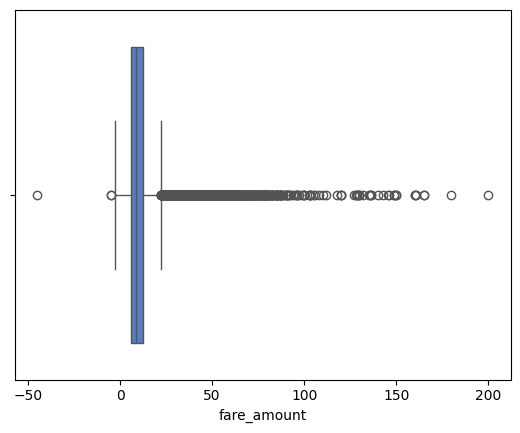

In [8]:
sns.boxplot(data=taxi, x='fare_amount')

In [9]:
# len(taxi.loc[~taxi['fare_amount'].between(0, 200)])
taxi = taxi.loc[taxi['fare_amount'].between(0, 200)]
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                99991 non-null  object             
 1   fare_amount        99991 non-null  float64            
 2   pickup_datetime    99991 non-null  datetime64[ns, UTC]
 3   pickup_longitude   99991 non-null  float64            
 4   pickup_latitude    99991 non-null  float64            
 5   dropoff_longitude  99991 non-null  float64            
 6   dropoff_latitude   99991 non-null  float64            
 7   passenger_count    99991 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.9+ MB


### Pickup Longitude

<Axes: xlabel='pickup_longitude'>

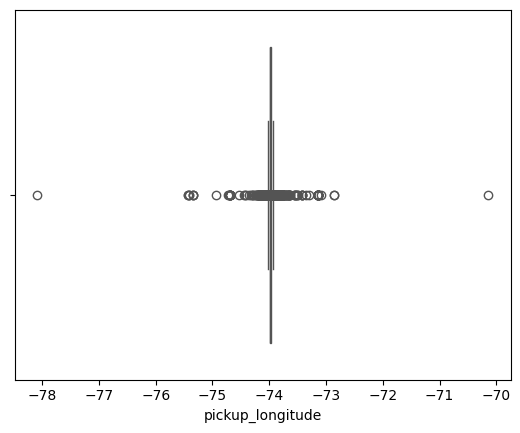

In [10]:
sns.boxplot(data=taxi.loc[taxi['pickup_longitude'].between(-80, -70)], x='pickup_longitude')

In [11]:
# len(taxi.loc[~taxi['pickup_longitude'].between(-74.5, -73.2)])
taxi = taxi.loc[taxi['pickup_longitude'].between(-74.5, -73.2)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97944.000000,97944.000000,97944.000000,97944.000000,97944.000000,97944.000000
mean,11.342689,-73.975327,40.754057,-73.910332,40.724703,1.674406
std,9.682259,0.035465,1.168396,2.169247,1.609781,1.300538
min,0.000000,-74.438233,0.783332,-84.654241,-2.269701,0.000000
25%,6.000000,-73.992265,40.736635,-73.991387,40.735681,1.000000
50%,8.500000,-73.982077,40.753523,-73.980425,40.753934,1.000000
75%,12.500000,-73.968308,40.767655,-73.965067,40.768463,2.000000
max,200.000000,-73.307595,401.083332,0.000000,404.616667,6.000000


### Pickup Latitude

<Axes: xlabel='pickup_latitude'>

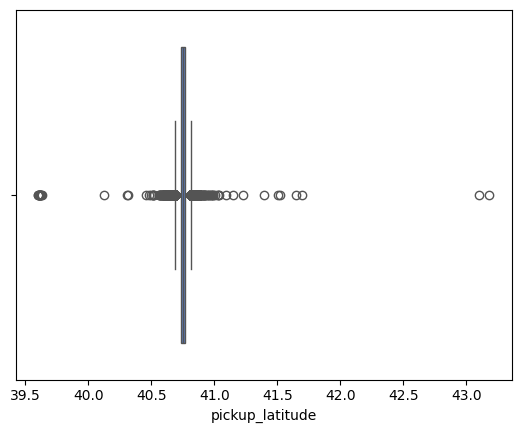

In [12]:
sns.boxplot(data=taxi.loc[taxi['pickup_latitude'].between(30, 50)], x='pickup_latitude')

In [13]:
# len(taxi.loc[~taxi['pickup_latitude'].between(40, 41.5)])
taxi = taxi.loc[taxi['pickup_latitude'].between(40, 41.5)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97921.000000,97921.000000,97921.000000,97921.000000,97921.000000,97921.000000
mean,11.343356,-73.975325,40.750936,-73.910324,40.724688,1.674462
std,9.683106,0.035422,0.027491,2.169500,1.609925,1.300538
min,0.000000,-74.438233,40.121653,-84.654241,-2.269701,0.000000
25%,6.000000,-73.992265,40.736652,-73.991387,40.735677,1.000000
50%,8.500000,-73.982077,40.753524,-73.980426,40.753933,1.000000
75%,12.500000,-73.968317,40.767655,-73.965078,40.768458,2.000000
max,200.000000,-73.307595,41.391042,0.000000,404.616667,6.000000


### Dropoff Longitude

<Axes: xlabel='dropoff_longitude'>

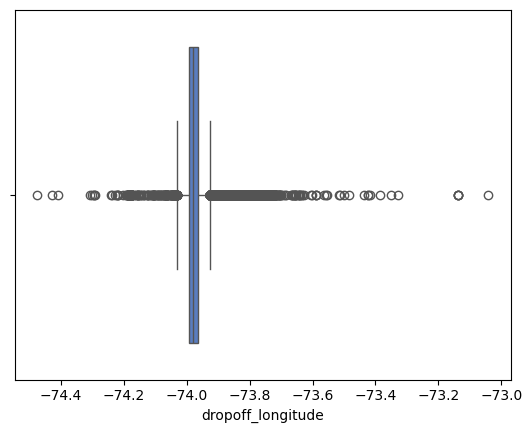

In [14]:
sns.boxplot(data=taxi.loc[taxi['dropoff_longitude'].between(-80, -70)], x='dropoff_longitude')

In [15]:
# len(taxi.loc[~taxi['dropoff_longitude'].between(-74.5, -73.2)])
taxi = taxi.loc[taxi['dropoff_longitude'].between(-74.5, -73.2)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97830.000000,97830.000000,97830.000000,97830.000000,97830.000000,97830.000000
mean,11.342409,-73.975333,40.750942,-73.974175,40.754669,1.674445
std,9.677959,0.035405,0.027485,0.035371,1.170799,1.300391
min,0.000000,-74.438233,40.121653,-74.474595,0.728087,0.000000
25%,6.000000,-73.992266,40.736652,-73.991397,40.735753,1.000000
50%,8.500000,-73.982082,40.753526,-73.980440,40.753957,1.000000
75%,12.500000,-73.968320,40.767659,-73.965148,40.768474,2.000000
max,200.000000,-73.307595,41.391042,-73.329048,404.616667,6.000000


### Dropoff Latitude

<Axes: xlabel='dropoff_latitude'>

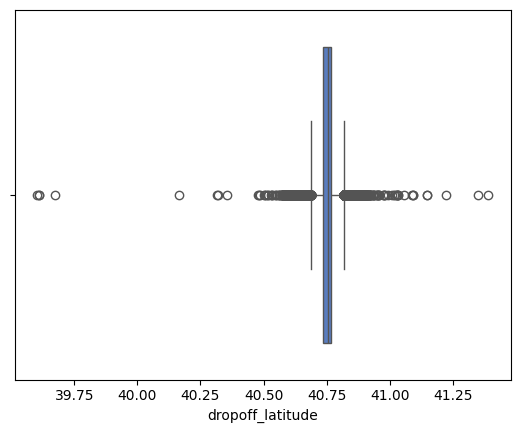

In [16]:
sns.boxplot(data=taxi.loc[taxi['dropoff_latitude'].between(30, 50)], x='dropoff_latitude')

In [17]:
# len(taxi.loc[~taxi['dropoff_latitude'].between(40, 41.5)])
taxi = taxi.loc[taxi['dropoff_latitude'].between(40, 41.5)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97824.000000,97824.000000,97824.000000,97824.000000,97824.000000,97824.000000
mean,11.342256,-73.975332,40.750943,-73.974175,40.751405,1.674456
std,9.678000,0.035406,0.027485,0.035371,0.031531,1.300416
min,0.000000,-74.438233,40.121653,-74.474595,40.164927,0.000000
25%,6.000000,-73.992266,40.736652,-73.991398,40.735762,1.000000
50%,8.500000,-73.982081,40.753526,-73.980441,40.753957,1.000000
75%,12.500000,-73.968320,40.767659,-73.965148,40.768474,2.000000
max,200.000000,-73.307595,41.391042,-73.329048,41.391042,6.000000


### Exact Same Pickup and Dropoff

In [18]:
taxi = taxi.loc[~((taxi['pickup_longitude'] == taxi['dropoff_longitude']) | (taxi['pickup_latitude'] == taxi['dropoff_latitude']))]

In [19]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96733 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                96733 non-null  object             
 1   fare_amount        96733 non-null  float64            
 2   pickup_datetime    96733 non-null  datetime64[ns, UTC]
 3   pickup_longitude   96733 non-null  float64            
 4   pickup_latitude    96733 non-null  float64            
 5   dropoff_longitude  96733 non-null  float64            
 6   dropoff_latitude   96733 non-null  float64            
 7   passenger_count    96733 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.6+ MB


### Passenger Count

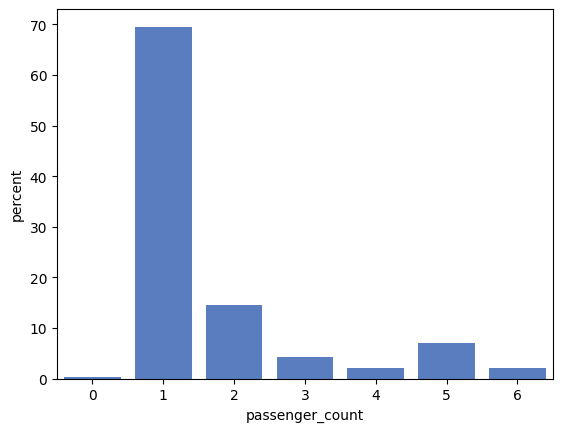

In [20]:
passenger_plt = sns.countplot(data=taxi, x='passenger_count', stat='percent')

In [21]:
# len(taxi.loc[taxi['passenger_count'] == 0])
taxi = taxi.loc[taxi['passenger_count'] != 0]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000
mean,11.344653,-73.975496,40.750970,-73.974338,40.751439,1.681020
std,9.552942,0.034872,0.027144,0.034822,0.031264,1.299043
min,0.000000,-74.438233,40.121653,-74.474595,40.164927,1.000000
25%,6.000000,-73.992285,40.736683,-73.991407,40.735778,1.000000
50%,8.500000,-73.982103,40.753538,-73.980465,40.753980,1.000000
75%,12.500000,-73.968448,40.767668,-73.965331,40.768482,2.000000
max,165.000000,-73.307595,41.150487,-73.329048,41.349023,6.000000


###

In [22]:
taxi.reset_index(drop=True, inplace=True)

In [23]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96376 entries, 0 to 96375
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                96376 non-null  object             
 1   fare_amount        96376 non-null  float64            
 2   pickup_datetime    96376 non-null  datetime64[ns, UTC]
 3   pickup_longitude   96376 non-null  float64            
 4   pickup_latitude    96376 non-null  float64            
 5   dropoff_longitude  96376 non-null  float64            
 6   dropoff_latitude   96376 non-null  float64            
 7   passenger_count    96376 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 5.9+ MB


## Feature Engineering

### Distance

In [24]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6371 * c
    return km

def distance_km(df):
    return haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

taxi['distance_km'] = distance_km(taxi)

### Time

In [25]:
def hour(df):
    return df['pickup_datetime'].dt.hour
def dayofweek(df):
    dow =  df['pickup_datetime'].dt.dayofweek
    return dow.replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun', })
def month(df):
    return df['pickup_datetime'].dt.month
def year(df):
    return df['pickup_datetime'].dt.year
def nighttime(df):
    return (df['hour'] >= 20) | (df['hour'] <= 5)

taxi['hour'] = hour(taxi)
taxi['dayofweek'] = dayofweek(taxi)
taxi['month'] = month(taxi)
taxi['year'] = year(taxi)
taxi['nighttime'] = nighttime(taxi)

### Passengers

In [26]:
def multiple_passengers(df):
    return np.where(df['passenger_count'] > 1, True, False)

taxi['multiple_passengers'] = multiple_passengers(taxi)

### Location

In [27]:
n_clusters = 16
n_init = 4
kmeans_pickup_loc = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1)
kmeans_dropoff_loc = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1)
kmeans_distance_loc = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1)

def cluster(model, features, fit):
    if fit: model.fit(features)
    clust_name_dict = {i:f'cluster_{c}' for i,c in enumerate(ascii_uppercase)}
    return pd.Series(model.predict(features)).replace(clust_name_dict)

def pickup_loc(df, fit=False):
    return cluster(kmeans_pickup_loc, df[['pickup_longitude', 'pickup_latitude']], fit=fit)
def dropoff_loc(df, fit=False):
    return cluster(kmeans_dropoff_loc, df[['dropoff_longitude', 'dropoff_latitude']], fit=fit)
def distance_loc(df, fit=False):
    return cluster(kmeans_distance_loc, df[['distance_km', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], fit=fit)

taxi['pickup_loc'] = pickup_loc(taxi, fit=True)
taxi['dropoff_loc'] = dropoff_loc(taxi, fit=True)
taxi['distance_loc'] = distance_loc(taxi, fit=True)

In [28]:
# sns.scatterplot(data=taxi, x='pickup_longitude', y='pickup_latitude', hue='pickup_loc', alpha=0.2)
# plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))
# plt.show(); plt.clf()

# sns.scatterplot(data=taxi, x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_loc', alpha=0.2)
# plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))

### Airports

In [29]:
def jfk(df):
    return (df['pickup_longitude'].between(-73.7841, -73.7721) & df['pickup_latitude'].between(40.6213, 40.6613)) | (df['dropoff_longitude'].between(-73.7841, -73.7721) & df['dropoff_latitude'].between(40.6213, 40.6613))
def lga(df):
    return (df['pickup_longitude'].between(-73.8870, -73.8580) & df['pickup_latitude'].between(40.7680, 40.7800)) | (df['dropoff_longitude'].between(-73.8870, -73.8580) & df['dropoff_latitude'].between(40.7680, 40.7800))
def ewr(df):
    return (df['pickup_longitude'].between(-74.1920, -74.1720) & df['pickup_latitude'].between(40.6760, 40.7080)) | (df['dropoff_longitude'].between(-74.1920, -74.1720) & df['dropoff_latitude'].between(40.6760, 40.7080))

taxi['jfk'] = jfk(taxi)
taxi['lga'] = lga(taxi)
taxi['ewr'] = ewr(taxi)

In [30]:
m = folium.Map(location=(40.7, -74.0))
folium.Marker(location=(40.642, -73.779), icon=folium.Icon(icon='plane', prefix='fa')).add_to(m)
folium.Marker(location=(40.776, -73.874), icon=folium.Icon(icon='plane', prefix='fa')).add_to(m)
folium.Marker(location=(40.691, -74.178), icon=folium.Icon(icon='plane', prefix='fa')).add_to(m)
# taxi.loc[taxi['jfk_pu']].apply(lambda r:folium.Marker(location=(r['pickup_latitude'], r['pickup_longitude'])).add_to(m), axis=1)

display(m)

### Direction

In [31]:
def bearing(lat1, lon1, lat2, lon2):
    dlon = lon2 - lon1
    
    x = np.cos(np.radians(lat2)) * np.sin(np.radians(dlon))
    y = np.cos(np.radians(lat1)) * np.sin(np.radians(lat2)) - np.sin(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(dlon))
    bearing_rad = np.arctan2(x, y)
    
    bearing_deg = np.degrees(bearing_rad)
    return bearing_deg

def direction(df):
    return round(bearing(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude']))

taxi['direction'] = direction(taxi)

In [32]:
# m = folium.Map(location=(40.7, -74.0))
# row = 2
# folium.Marker(location=(taxi.iloc[row]['pickup_latitude'], taxi.iloc[row]['pickup_longitude']), icon=folium.Icon(icon='p', prefix='fa')).add_to(m)
# folium.Marker(location=(taxi.iloc[row]['dropoff_latitude'], taxi.iloc[row]['dropoff_longitude']), icon=folium.Icon(icon='d', prefix='fa')).add_to(m)
# display(m)

# print(taxi.iloc[row]['direction'])

### OSM Distance

In [188]:
G = ox.graph_from_place('Manhattan, NY, USA', network_type='drive')
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

G = nx.relabel.convert_node_labels_to_integers(G)
G_ig = ig.Graph.from_networkx(G)

In [227]:
def get_osm_nodes(df):
    p_nodes, p_nodes_dist = ox.nearest_nodes(G, Y=df['pickup_latitude'], X=df['pickup_longitude'], return_dist=True)
    d_nodes, d_nodes_dist = ox.nearest_nodes(G, Y=df['dropoff_latitude'], X=df['dropoff_longitude'], return_dist=True)
    return p_nodes, d_nodes, p_nodes_dist, d_nodes_dist

def get_osm_distances(p_nodes, d_nodes, mask):
    distances = np.empty(len(p_nodes))
    for i in range(len(p_nodes)):
        if mask[i]:
            dist = G_ig.distances(p_nodes[i], d_nodes[i], weights='length')[0][0]
            if (dist == 0) | (dist == np.inf):
                print(f'Row {i}: {dist}', end='  ')
                distances[i] = np.NaN
            else:
                distances[i] = dist
        else:
            distances[i] = np.NaN
    distances = (distances / 1000)
    return distances

def get_osm_travel_times(p_nodes, d_nodes, mask):
    travel_times = np.empty(len(p_nodes))
    for i in range(len(p_nodes)):
        if mask[i]:
            t_time = G_ig.distances(p_nodes[i], d_nodes[i], weights='travel_time')[0][0]
            if (t_time == 0) | (t_time == np.inf):
                print(f'Row {i}: {t_time}', end='  ')
                travel_times[i] = np.NaN
            else:
                travel_times[i] = t_time
        else:
            travel_times[i] = np.NaN
    return travel_times

def osm_metric(df, metric='distances'):
    p_nodes, d_nodes, p_nodes_dist, d_nodes_dist = get_osm_nodes(df)
    
    mask = np.where(((np.array(p_nodes_dist) < 100) & (np.array(d_nodes_dist) < 100)), True, False)   # Distance in m

    if metric == 'distances': 
        distances = get_osm_distances(p_nodes, d_nodes, mask)
        return distances
    elif metric == 'travel_times':
        travel_times = get_osm_travel_times(p_nodes, d_nodes, mask)
        return travel_times
    elif metric == 'both':
        distances = get_osm_distances(p_nodes, d_nodes, mask)
        travel_times = get_osm_travel_times(p_nodes, d_nodes, mask)
        return distances, travel_times
    else:
        raise Exception('Invalid metric choice...')

def update_distance(df):
    osm_distances = osm_metric(df, metric='distances')
    print(f'\nNaN percent: {round((pd.Series(osm_distances).isna().sum()) * 100 / len(osm_distances), 2)}%')

    return np.where(~np.isnan(osm_distances), osm_distances, df['distance_km'])

## Visualisations

### Fare vs Distance

<Axes: xlabel='distance_km', ylabel='fare_amount'>

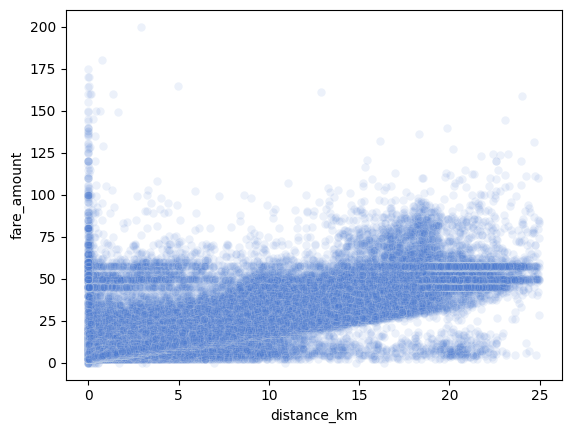

In [234]:
sns.scatterplot(data=taxi.loc[taxi['distance_km'] <= 25], x='distance_km', y='fare_amount', alpha=0.1)

In [235]:
# sns.lmplot(data=taxi.loc[taxi['distance_km'] <= 25], x='distance_km', y='fare_amount', hue='passenger_count', scatter_kws={'alpha':0.1})

### Fare vs Passengers

<Axes: xlabel='passenger_count', ylabel='count'>

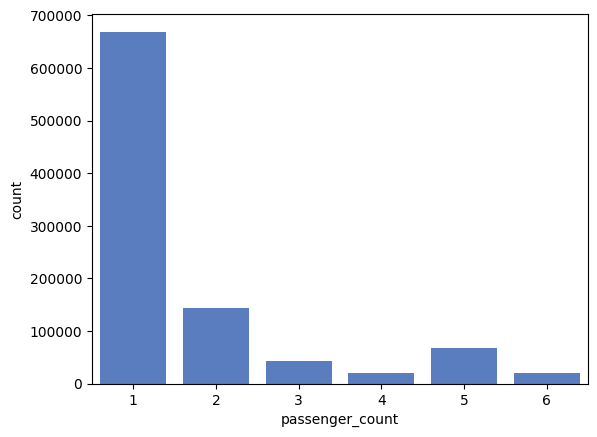

In [236]:
sns.countplot(data=taxi, x='passenger_count')

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

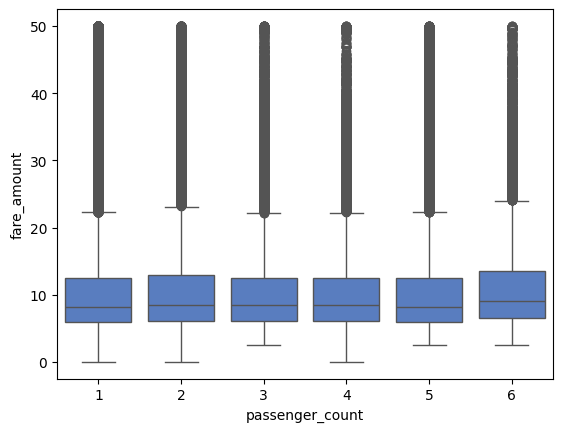

In [237]:
sns.boxplot(data=taxi.loc[taxi['fare_amount'] <= 50], x='passenger_count', y='fare_amount')

<Axes: xlabel='multiple_passengers', ylabel='fare_amount'>

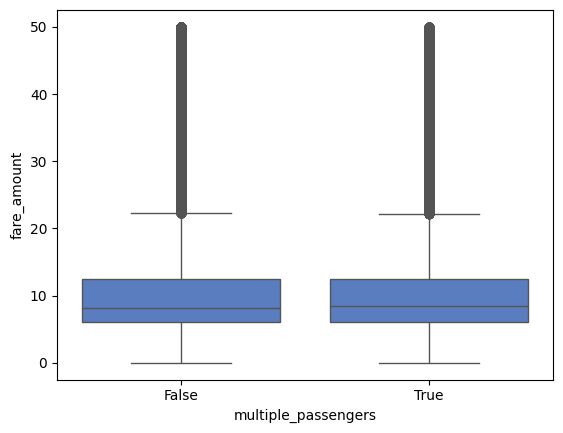

In [238]:
taxi_pass_red = taxi.copy()
taxi_pass_red['multiple_passengers'] = np.where(taxi_pass_red['passenger_count'] > 1, True, False)

sns.boxplot(data=taxi_pass_red.loc[taxi_pass_red['fare_amount'] <= 50], x='multiple_passengers', y='fare_amount')

In [239]:
# sns.lmplot(data=taxi_pass_red.loc[taxi_pass_red['distance_km'] <= 25], x='distance_km', y='fare_amount', hue='multiple_passengers', scatter_kws={'alpha':0.02})

### Fare vs Time

#### Fare vs Pickup Hour

Text(0.5, 1.0, 'Fare vs Hour')

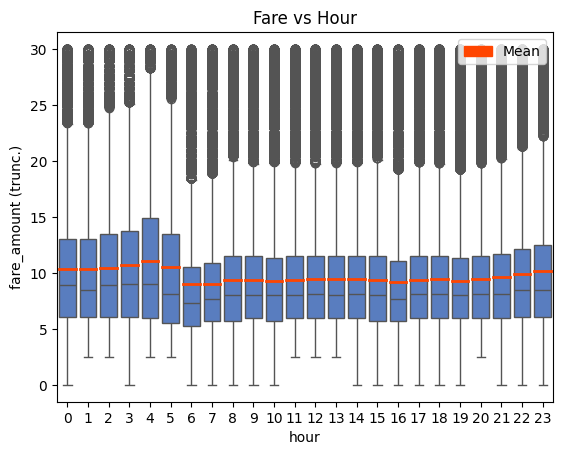

In [240]:
fare_hour_box = sns.boxplot(data=taxi.loc[taxi['fare_amount'] <= 30], x='hour', y='fare_amount', showmeans=True, meanline=True, meanprops={'linestyle':'-', 'linewidth':2, 'color':'orangered'})
fare_hour_box.set_ylabel(f'{fare_hour_box.get_ylabel()} (trunc.)')
plt.legend(handles=[mpatches.Patch(color='orangered', label='Mean')], loc='upper right')
plt.title('Fare vs Hour')

#### Fare vs Pickup Day of Week

Text(0.5, 1.0, 'Fare vs Day of Week')

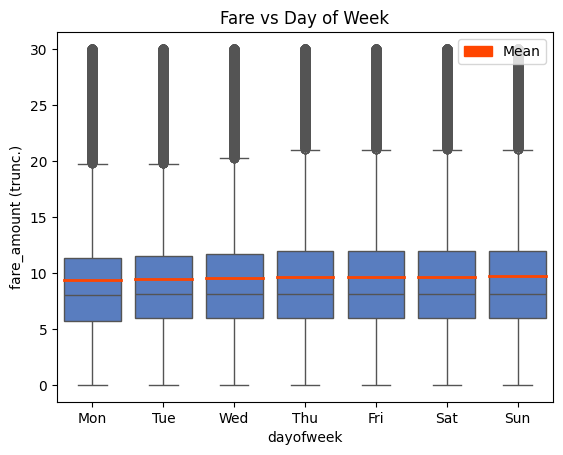

In [241]:
fare_dayofweek_box = sns.boxplot(data=taxi.loc[taxi['fare_amount'] <= 30], x='dayofweek', y='fare_amount', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], showmeans=True, meanline=True, meanprops={'linestyle':'-', 'linewidth':2, 'color':'orangered'})
fare_dayofweek_box.set_ylabel(f'{fare_dayofweek_box.get_ylabel()} (trunc.)')
plt.legend(handles=[mpatches.Patch(color='orangered', label='Mean')], loc='upper right')
plt.title('Fare vs Day of Week')

#### Fare vs Pickup Month

Text(0.5, 1.0, 'Fare vs Month')

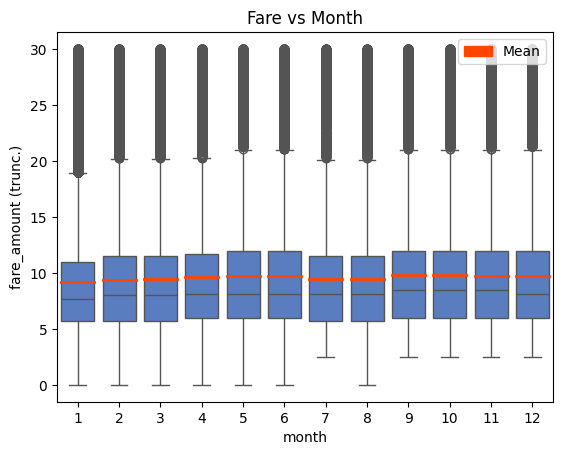

In [242]:
fare_month_box = sns.boxplot(data=taxi.loc[taxi['fare_amount'] <= 30], x='month', y='fare_amount', showmeans=True, meanline=True, meanprops={'linestyle':'-', 'linewidth':2, 'color':'orangered'})
fare_month_box.set_ylabel(f'{fare_month_box.get_ylabel()} (trunc.)')
plt.legend(handles=[mpatches.Patch(color='orangered', label='Mean')], loc='upper right')
plt.title('Fare vs Month')

#### Fare vs Pickup Year

Text(0.5, 1.0, 'Fare vs Year')

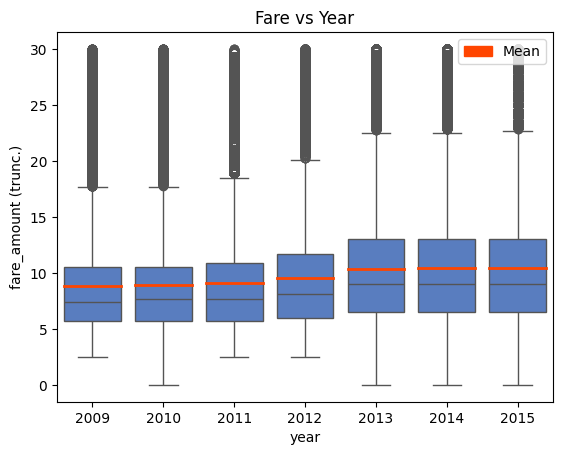

In [243]:
fare_year_box = sns.boxplot(data=taxi.loc[taxi['fare_amount'] <= 30], x='year', y='fare_amount', showmeans=True, meanline=True, meanprops={'linestyle':'-', 'linewidth':2, 'color':'orangered'})
fare_year_box.set_ylabel(f'{fare_year_box.get_ylabel()} (trunc.)')
plt.legend(handles=[mpatches.Patch(color='orangered', label='Mean')], loc='upper right')
plt.title('Fare vs Year')

#### Fare vs Pickup Day of Week and Hour

<Axes: xlabel='dayofweek', ylabel='hour'>

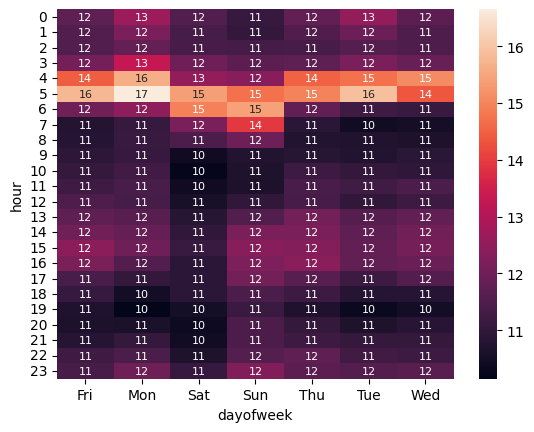

In [244]:
fare_dayofweek_hour = taxi.groupby(['dayofweek', 'hour'])['fare_amount'].mean().reset_index()
fare_dayofweek_hour = fare_dayofweek_hour.pivot(index='hour', columns='dayofweek', values='fare_amount')

sns.heatmap(data=fare_dayofweek_hour, annot=True, annot_kws={'size':8})

### Location

In [245]:
# sns.scatterplot(data=taxi.loc[taxi['fare_amount'] <= 50], x='dropoff_longitude', y='dropoff_latitude', hue='fare_amount', alpha=0.5)

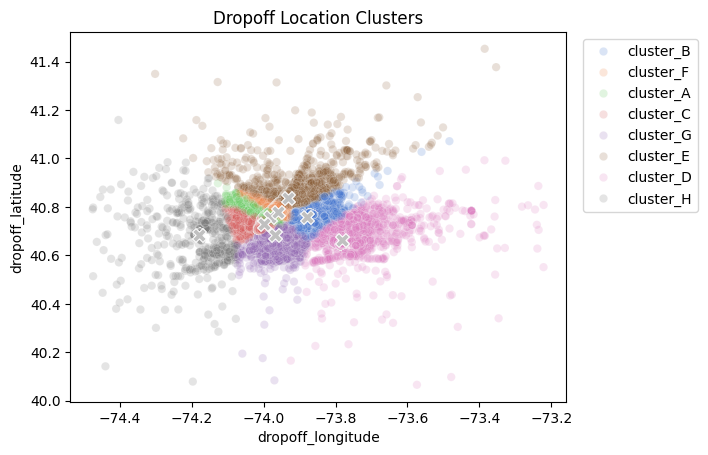

In [246]:
dropoff_locs = taxi[['dropoff_longitude', 'dropoff_latitude']]
# scaler = StandardScaler()
# scaled_dropoff_locs = scaler.fit_transform(dropoff_locs)

kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(dropoff_locs)

clust_name_dict = {i:f'cluster_{c}' for i,c in enumerate(ascii_uppercase)}
kmeans_clusters = pd.Series(kmeans.labels_).replace(clust_name_dict)
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0:'dropoff_longitude', 1:'dropoff_latitude'}, index=clust_name_dict)

sns.scatterplot(data=taxi, x='dropoff_longitude', y='dropoff_latitude', hue=kmeans_clusters, alpha=0.2)
sns.scatterplot(data=kmeans_centroids, x='dropoff_longitude', y='dropoff_latitude', s=100, c='silver', marker='X')
plt.title('Dropoff Location Clusters')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))

In [247]:
kmeans_cluster_fares = pd.DataFrame()
kmeans_cluster_fares['count'] = taxi.groupby(kmeans_clusters)['key'].count()
kmeans_cluster_fares['mean'] = taxi.groupby(kmeans_clusters)['fare_amount'].mean()
kmeans_cluster_fares['mean_diff'] = kmeans_cluster_fares['mean'] - taxi['fare_amount'].mean()
kmeans_cluster_fares['summed_diff'] = kmeans_cluster_fares['count'] * abs(kmeans_cluster_fares['mean_diff'])
print(kmeans_cluster_fares['summed_diff'].sum()/len(taxi))
kmeans_cluster_fares.head(len(kmeans_cluster_fares))

2.7064868378338787


,count,mean,mean_diff,summed_diff
cluster_A,387641,9.700317,-1.630273,631960.602064
cluster_B,29727,23.904141,12.573551,373773.938472
cluster_C,255988,10.081497,-1.249093,319752.885290
cluster_D,10995,40.945087,29.614497,325611.391989
cluster_E,20507,19.905443,8.574853,175844.509078
cluster_F,213043,9.670910,-1.659680,353583.163987
cluster_G,44914,18.847878,7.517288,337631.456815
cluster_H,1754,64.030336,52.699746,92435.354987


### Direction

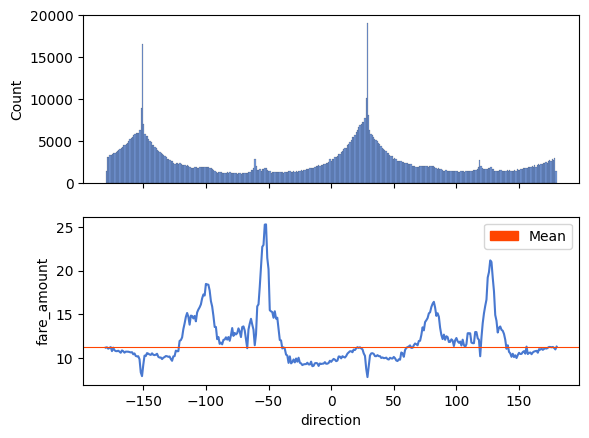

In [248]:
fig, axs = plt.subplots(2, 1, sharex=True)

direction_round = round(taxi['direction'])
sns.histplot(ax=axs[0], data=direction_round, bins=361)

direction_fare_group = taxi.groupby(direction_round)['fare_amount'].mean()
sns.lineplot(ax=axs[1], data=direction_fare_group)
plt.axhline(y=taxi['fare_amount'].mean(), color='orangered', linewidth=0.8)
plt.legend(handles=[mpatches.Patch(color='orangered', label='Mean')], loc='upper right')

### OSM Distance

5.671613000000002
4.155444291845812


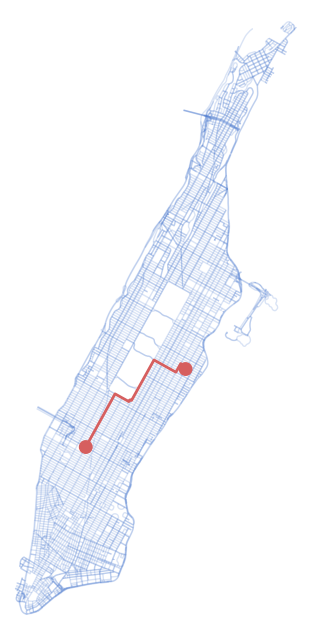

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [193]:
row = 7
pickup_node = ox.nearest_nodes(G, Y=taxi.iloc[row]['pickup_latitude'], X=taxi.iloc[row]['pickup_longitude'])
dropoff_node = ox.nearest_nodes(G, Y=taxi.iloc[row]['dropoff_latitude'], X=taxi.iloc[row]['dropoff_longitude'])

shortest_route = ox.shortest_path(G, pickup_node, dropoff_node, weight='length')

print(nx.shortest_path_length(G, pickup_node, dropoff_node, weight='length') / 1000)
print(taxi.iloc[row]['distance_km'])

display(ox.plot_graph_route(G=G, route=shortest_route, route_color=pal[3], route_linewidth=2, route_alpha=1, edge_color=pal[0], edge_alpha=0.2, bgcolor='w', node_size=0))

## Feature Selection

In [32]:
y = taxi['fare_amount']

num_features = ['distance_km', 'direction', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
cat_features = ['nighttime', 'jfk', 'lga', 'ewr']
cat_ohe_features = ['year', 'pickup_loc', 'dropoff_loc', 'distance_loc']

features_list = num_features + cat_features + cat_ohe_features

X_cat = taxi[features_list]
X = pd.get_dummies(X_cat, columns=cat_ohe_features)
cat_labels = [f for f in X if f.startswith(tuple(cat_features + cat_ohe_features))]

## Modelling

In [250]:
test_size_vals = [0.01, 0.1, 0.2]
results_dict = {}

repeats = 10
aggr_RMSE_list = [0 for _ in range(repeats)]

# model = LinearRegression()
model = HistGradientBoostingRegressor(max_leaf_nodes=20, categorical_features=cat_labels)
for test_size_val in test_size_vals:
    for repeat in range(repeats):
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size_val, random_state=repeat)
        model.fit(train_X, train_y)
        pred_y = model.predict(val_X)
        aggr_RMSE_list[repeat] = mean_squared_error(val_y, pred_y, squared=False)
    aggr_RMSE = (sum(aggr_RMSE_list)/repeats)
    results_dict[test_size_val] = round(aggr_RMSE, 4)

results = pd.Series(results_dict)
print(f"Mean RMSE: {results.mean():.4f}")
print(results)

Mean RMSE: 3.4909
0.01    3.4598
0.10    3.4968
0.20    3.5160
dtype: float64


In [254]:
# model = HistGradientBoostingRegressor(categorical_features=cat_labels)
# params ={'max_iter':[100, 150, 200], 'max_leaf_nodes':[31, 20, 25], 'max_depth':[None, 8, 10, 12]}
# gs_cv = GridSearchCV(model, params, verbose=1)
# gs_cv.fit(X, y)
# pd.DataFrame(gs_cv.cv_results_).sort_values(by='rank_test_score')

## Final Model and Predictions

In [ ]:
model = HistGradientBoostingRegressor(max_leaf_nodes=20, categorical_features=cat_labels, random_state=0)
model.fit(X, y)

In [34]:
test = pd.read_csv('test.csv')

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['distance_km'] = distance_km(test)
test['hour'] = hour(test)
test['dayofweek'] = dayofweek(test)
test['month'] = month(test)
test['year'] = year(test)
test['nighttime'] = nighttime(test)
test['multiple_passengers'] = multiple_passengers(test)
test['pickup_loc'] = pickup_loc(test)
test['dropoff_loc'] = dropoff_loc(test)
test['distance_loc'] = distance_loc(test)
test['jfk'] = jfk(test)
test['lga'] = lga(test)
test['ewr'] = ewr(test)
test['direction'] = direction(test)

In [35]:
test_X_cat = test[features_list]
test_X = pd.get_dummies(test_X_cat, columns=cat_ohe_features)

test_preds = model.predict(test_X)

## Submission

In [36]:
output = pd.DataFrame({'key': test['key'], 'fare_amount': test_preds})
output.to_csv('submission.csv', index=False)